In [ ]:
import sys
import os
import pickle

sys.path.append("/home4/s4683099/Deep-AGN-Clean")

TEST_DATA_DIR = "/home4/s4683099/Deep-AGN-Clean/examples/results/test_data.pkl"

with open(TEST_DATA_DIR, "rb") as f:
    X_test, y_test = pickle.load(f)

# These two line are necessary to ensure the paths are correct
# when running the script in the Jupyter notebook environment
# as Jupyter might not set the working directory to the script's location.
X_test = ["/scratch/s4683099/data_JWST/" + x for x in X_test]
y_test = ["/scratch/s4683099/data_JWST/" + y for y in y_test]

# Prepare the data

In [2]:
from data_pipeline import FitsLoader, GalaxyDataset

# Define the path to the data directory
PATH = "/scratch/s4683099/data_JWST"

dataset = GalaxyDataset(X_test, y_test)

loader = FitsLoader(dataset, batch_size=16, shuffle=False)

# Setup the testing

In [3]:
from model_testing import Tester, AVALIABLE_METRICS

print("Available metrics:")
for metric in AVALIABLE_METRICS:
    print("Metric:", metric)

tester = Tester(
    model_type="UNet",
    model_filename="my_model_best_model", # No .pth extension needed
    data_folder="/home4/s4683099/Deep-AGN-Clean/examples/results", # The folder where the model is saved
    test_loader=loader,
    transform=None,
    # Additional parameters that can be passed to the model
)

2025-06-04 22:44:45.519867: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 22:44:45.535352: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-04 22:44:45.552710: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-04 22:44:45.558058: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-04 22:44:45.572212: I tensorflow/core/platform/cpu_feature_guar

Available metrics:
Metric: PSNR
Metric: PSNR PSF
Metric: SSIM
Metric: SSIM PSF
Metric: Centroid Error
Metric: FRF
Metric: FRF PSF
Metric: Reconstruction Loss
〚 ***************************  Initializing model tester...  *************************** 〛
BasicUNet features: (32, 32, 64, 128, 256, 32).

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model `my_model_best_model` loaded successfully!                                         │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Model Tester initialized.                                                                │
│ Model type: UNet                                                                         │
│ Model filename: my_model_best_model                                                      │
│ Data folder: /home4/s4683099/Deep-AGN-Clean/exam

# General test

In [4]:
tester.test_model(metrics=AVALIABLE_METRICS)

〚 *********************************  Testing model...  ********************************* 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Retrieved metrics:                                                                       │
│  - PSNR                                                                                  │
│  - PSNR PSF                                                                              │
│  - SSIM                                                                                  │
│  - SSIM PSF                                                                              │
│  - Centroid Error                                                                        │
│  - FRF                                                                                   │
│  - FRF PSF                                                                               │
│  - Reconstruction Loss                                               

Evaluating: 100%|██████████| 15/15 [00:00<00:00, 16.07it/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Results:                                                                                 │
│ PSNR: 32.856                                                                             │
│ PSNR PSF: 74.789                                                                         │
│ SSIM: 0.929                                                                              │
│ SSIM PSF: 1.000                                                                          │
│ Centroid Error: 0.092                                                                    │
│ FRF: -0.323                                                                              │
│ FRF PSF: 0.675                                                                           │
│ Reconstruction Loss: 0.031                                                               │
│                                                                    

{'real_psf_fluxes': [1908.774658203125,
  25.115455627441406,
  66.97455596923828,
  904.1564331054688,
  301.385498046875,
  43.05506896972656,
  293.31158447265625,
  31.426246643066406,
  2388.39453125,
  53.873558044433594,
  102.84952545166016,
  502.8199462890625,
  558.260498046875,
  957.0179443359375,
  0.0,
  195.753662109375,
  4545.8349609375,
  358.8817138671875,
  47.19824981689453,
  0.0,
  144.01516723632812,
  29.71741485595703,
  66.86418914794922,
  178.30450439453125,
  61.06452178955078,
  0.0,
  40.709678649902344,
  27.139785766601562,
  21.920597076416016,
  33.30792236328125,
  60.46971893310547,
  1010.7081909179688,
  449.20367431640625,
  19.817808151245117,
  28.075231552124023,
  262.03546142578125,
  7791.97216796875,
  1593.8123779296875,
  17531.9375,
  1048.9193115234375,
  4545.31689453125,
  2921.9892578125,
  11.24204158782959,
  71.19959259033203,
  53.399696350097656,
  498.397216796875,
  320.3981628417969,
  23.733198165893555,
  370.92327880859

# We can do a test on the different AGN fractions individually

In [5]:
pa = tester.performance_analysis(metrics=AVALIABLE_METRICS)

〚 ************************  Performing performance analysis...  ************************ 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Retrieved metrics:                                                                       │
│  - PSNR                                                                                  │
│  - PSNR PSF                                                                              │
│  - SSIM                                                                                  │
│  - SSIM PSF                                                                              │
│  - Centroid Error                                                                        │
│  - FRF                                                                                   │
│  - FRF PSF                                                                               │
│  - Reconstruction Loss                                               

Performing performance analysis:   0%|          | 0/20 [00:00<?, ?f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 10 pairs with AGN fraction f_agn = 0.95.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.95...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 20.69it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 17 pairs with AGN fraction f_agn = 0.20.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.20...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  10%|█         | 2/20 [00:00<00:01, 15.86f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 20 pairs with AGN fraction f_agn = 0.40.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.40...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 2/2 [00:00<00:00, 29.65it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 14 pairs with AGN fraction f_agn = 0.90.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.90...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  20%|██        | 4/20 [00:00<00:00, 16.18f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 12 pairs with AGN fraction f_agn = 0.75.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.75...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 22.29it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 13 pairs with AGN fraction f_agn = 0.30.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.30...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 21.61it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 17 pairs with AGN fraction f_agn = 0.70.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.70...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  35%|███▌      | 7/20 [00:00<00:00, 18.28f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 8 pairs with AGN fraction f_agn = 0.44.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.44...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 19.57it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 19 pairs with AGN fraction f_agn = 0.80.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.80...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  45%|████▌     | 9/20 [00:00<00:00, 17.24f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 18 pairs with AGN fraction f_agn = 0.0.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.0...                                                   │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 2/2 [00:00<00:00, 30.62it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 15 pairs with AGN fraction f_agn = 0.60.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.60...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  55%|█████▌    | 11/20 [00:00<00:00, 16.90f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 3 pairs with AGN fraction f_agn = 0.15.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.15...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 63.30it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 9 pairs with AGN fraction f_agn = 0.35.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.35...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 24.68it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 14 pairs with AGN fraction f_agn = 0.10.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.10...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 31.80it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 13 pairs with AGN fraction f_agn = 0.50.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.50...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  75%|███████▌  | 15/20 [00:00<00:00, 21.55f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 30 pairs with AGN fraction f_agn = 0.5.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.5...                                                   │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 2/2 [00:00<00:00, 31.44it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 10 pairs with AGN fraction f_agn = 0.25.                             │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.25...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 40.02it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 8 pairs with AGN fraction f_agn = 0.54.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.54...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis:  90%|█████████ | 18/20 [00:00<00:00, 22.60f_agn/s]


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 6 pairs with AGN fraction f_agn = 0.85.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.85...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Evaluating: 100%|██████████| 1/1 [00:00<00:00, 27.11it/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 5 pairs with AGN fraction f_agn = 0.65.                              │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performing analysis for f_agn = 0.65...                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Performing performance analysis: 100%|██████████| 20/20 [00:00<00:00, 20.47f_agn/s]



┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Data dumped in                                                                           │
│ `/home4/s4683099/Deep-AGN-Clean/examples/results/my_model_best_model_performance_analysis.pkl` │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performance analysis saved successfully!                                                 │
└──────────────────────────────────────────────────────────────────────────────────────────┘

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performance analysis:                                                                    │
└──────────────────────────────────────────────────────────────────────────────────────────┘
                     PSNR  PSNR PSF   SSIM  SSIM PSF  Centroi

# One can also interpret those results and compare different models

In [6]:
from copy import deepcopy
from model_testing import ResultInterpreter

pa2 = deepcopy(pa)

interpreter = ResultInterpreter()

interpreter.compare_model_performance(
    [pa, pa2],
    verbose=True,
    latex=False # Optionally set to True for LaTeX output
)


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Performance comparison:                                                                  │
└──────────────────────────────────────────────────────────────────────────────────────────┘
                     my_model_best_model  my_model_best_model
PSNR                           38.985083            38.985083
PSNR PSF                       61.116258            61.116258
SSIM                            0.970258             0.970258
SSIM PSF                        0.994397             0.994397
Centroid Error                  0.094320             0.094320
FRF                            -0.311539            -0.311539
FRF PSF                         0.548025             0.548025
Reconstruction Loss             0.031072             0.031072


my_model_best_model  my_model_best_model
PSNR                           38.985083            38.985083
PSNR PSF                       61.116258            61.116258
SSIM                            0.970258             0.970258
SSIM PSF                        0.994397             0.994397
Centroid Error                  0.094320             0.094320
FRF                            -0.311539            -0.311539
FRF PSF                         0.548025             0.548025
Reconstruction Loss             0.031072             0.031072

# Making plots of the metrics is simple with the `Plotter` class


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Retrieved metrics:                                                                       │
│  - PSNR                                                                                  │
│  - PSNR PSF                                                                              │
│  - SSIM                                                                                  │
│  - SSIM PSF                                                                              │
│  - Centroid Error                                                                        │
│  - FRF                                                                                   │
│  - FRF PSF                                                                               │
│  - Reconstruction Loss                                                                   │
│                                                                    

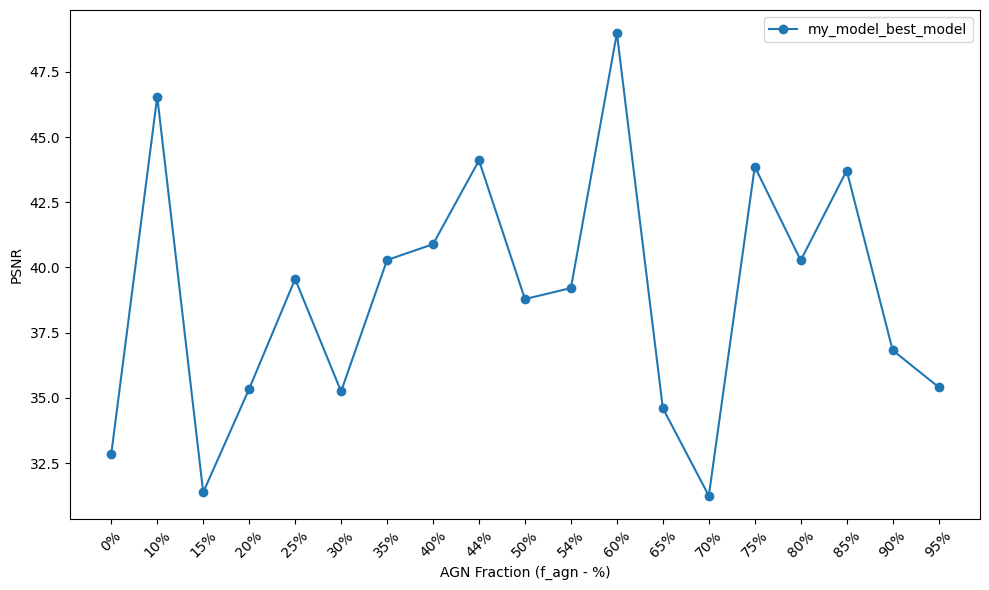

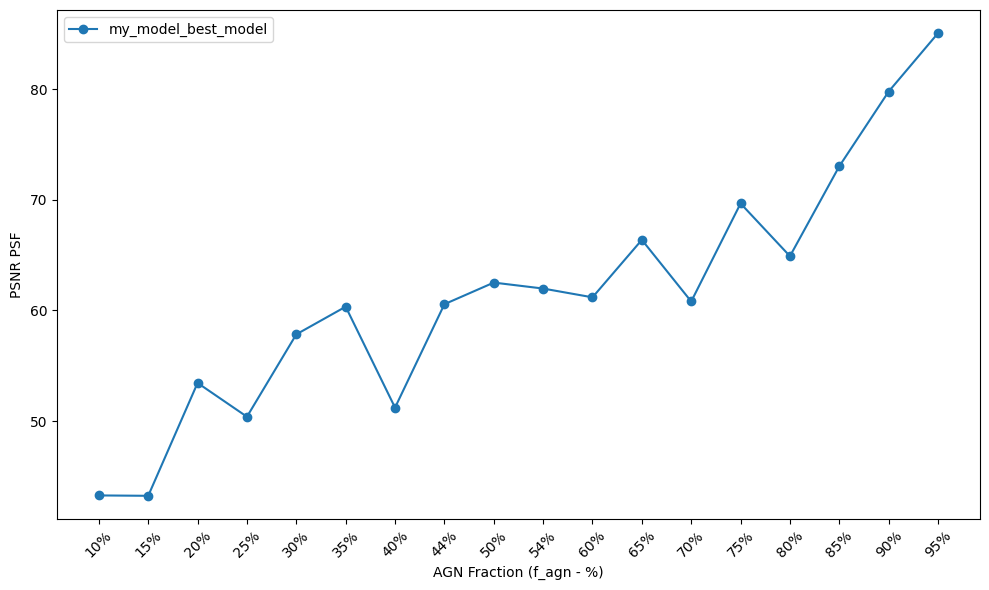

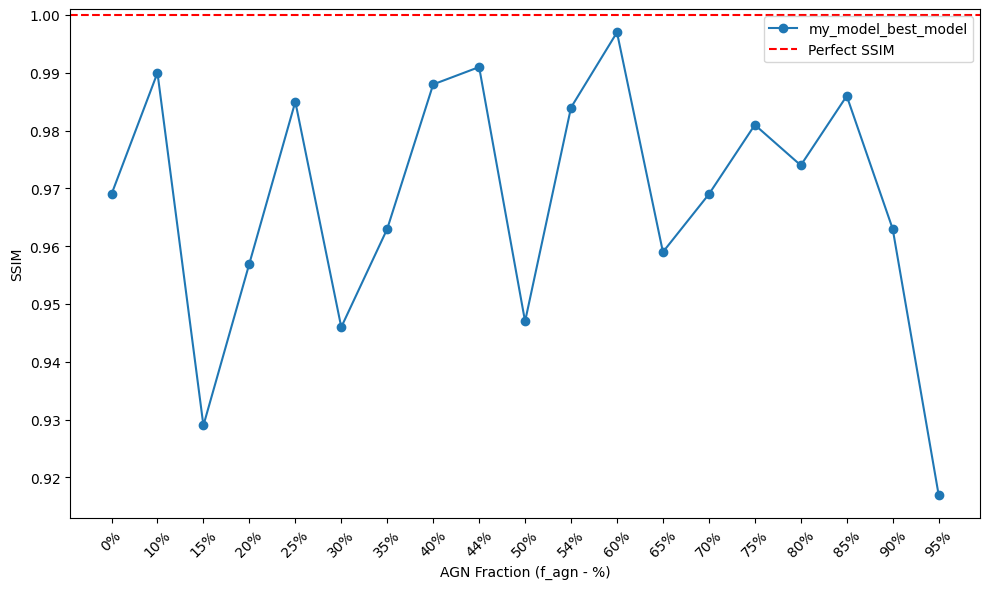

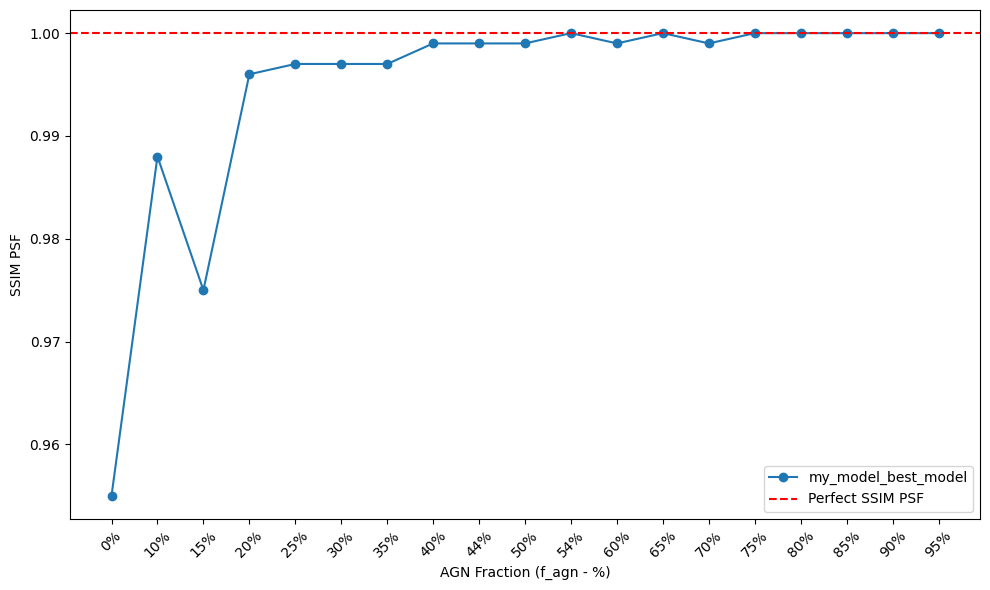

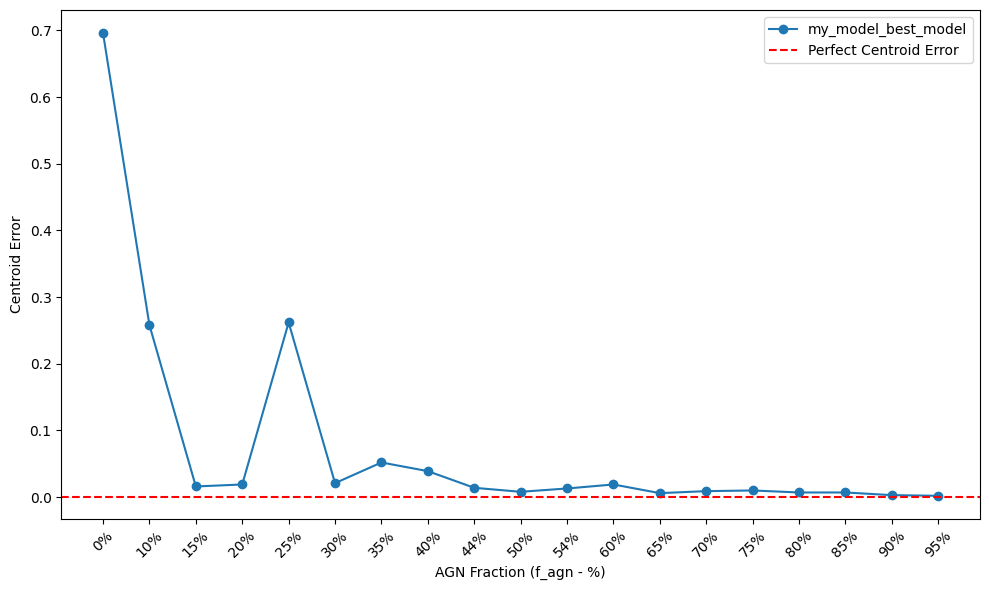

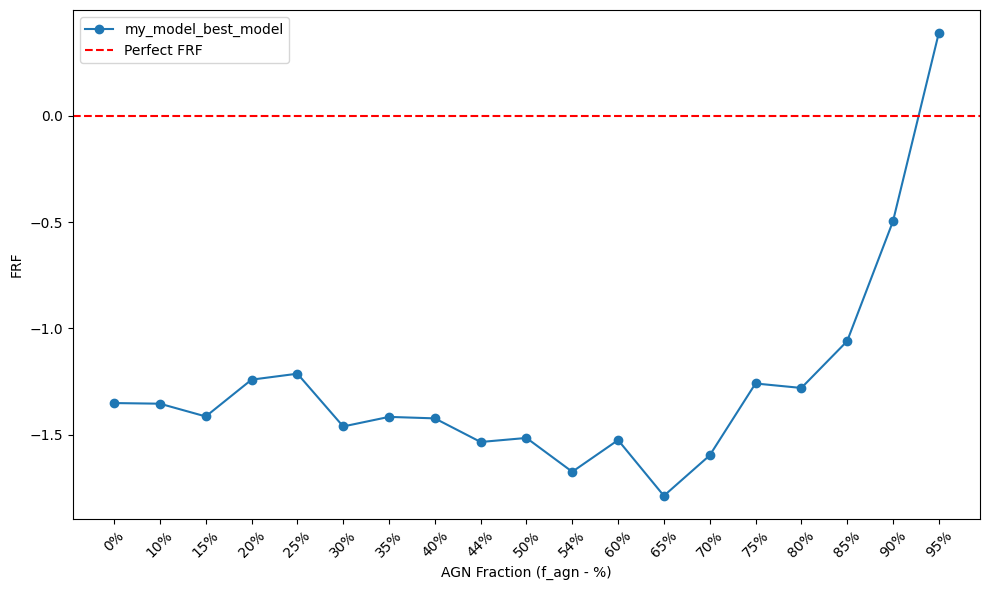

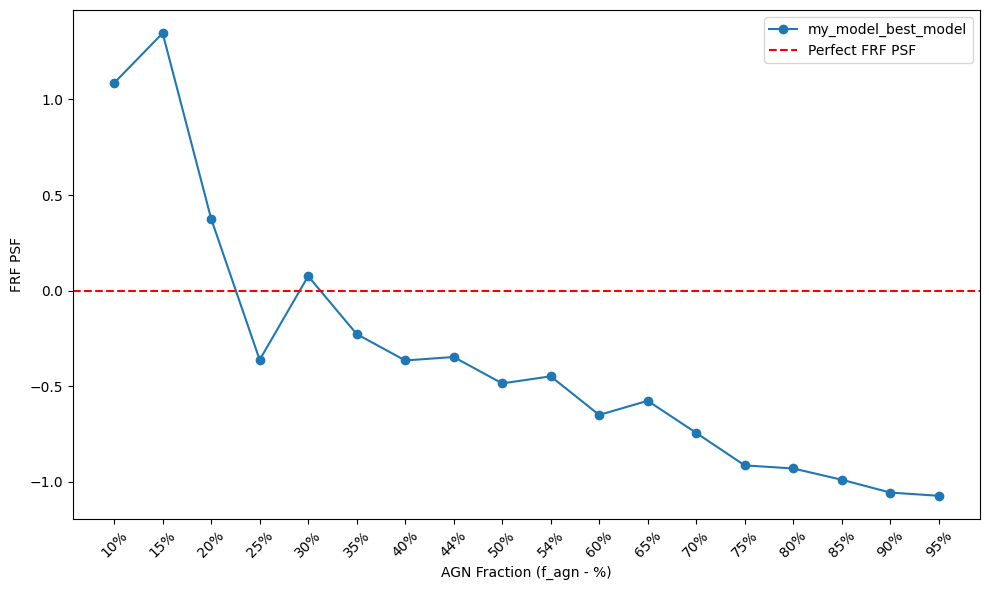

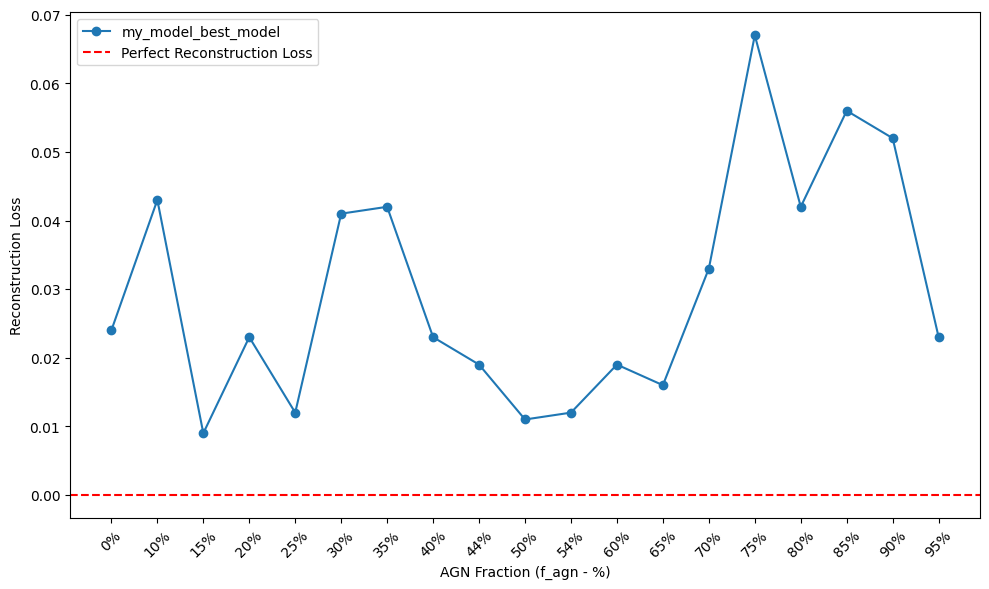

In [7]:
from model_testing import Plotter

plotter = Plotter()

plotter.make_trend_plots(
    [pa], # List of performance analysis objects
    data_folder="default",
    save=False
)

# One can also make a 2d histogram of the distribution of the predicted vs real fluxes


┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Retrieved fluxes:                                                                        │
│ Real PSF Fluxes: (231,)                                                                  │
│ Predicted PSF Fluxes: (231,)                                                             │
│ Real Galaxy Fluxes: (231,)                                                               │
│ Predicted Galaxy Fluxes: (231,)                                                          │
└──────────────────────────────────────────────────────────────────────────────────────────┘
〚 *****************************  Creating 2D histogram...  ***************************** 〛


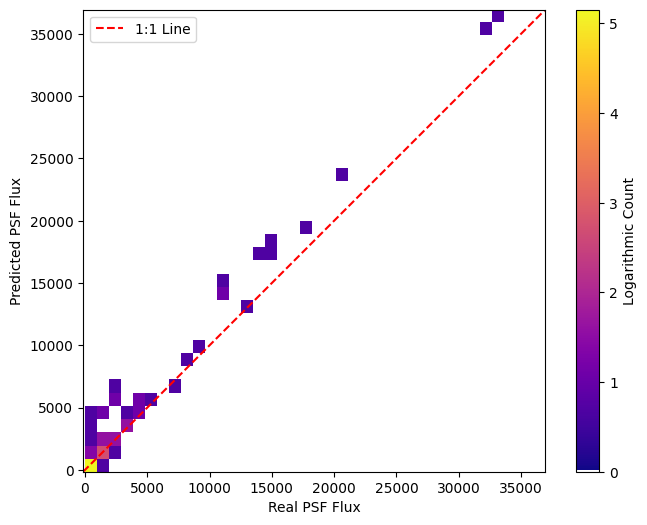

〚 ************************  2D histogram created successfully!  ************************ 〛


In [8]:
real_psf_fluxes, predicted_psf_fluxes, _, _ = pa.get_all_fluxes_np()

plotter.make_2d_histogram(
    real_psf_fluxes,
    predicted_psf_fluxes,
    histogram_filename="default",
    data_folder="default",
    x_label="Real PSF Flux",
    y_label="Predicted PSF Flux",
    save=False
)

# We can also use the `Tester` class to clean images and then use the `Plotter` class for plotting

〚 ********************************  Cleaning images...  ******************************** 〛


Cleaning images: 100%|██████████| 1/1 [00:00<00:00, 110.36image/s]

Source shape: (2, 1, 128, 128)
Target shape: (2, 1, 128, 128)
Cleaned image shape: (2, 1, 128, 128)
PSF predicted shape: (2, 1, 128, 128)
PSF shape: (2, 1, 128, 128)
〚 *****************************  Image cleaning completed!  ***************************** 〛
〚 ****************************  Making diagnostic plots...  **************************** 〛


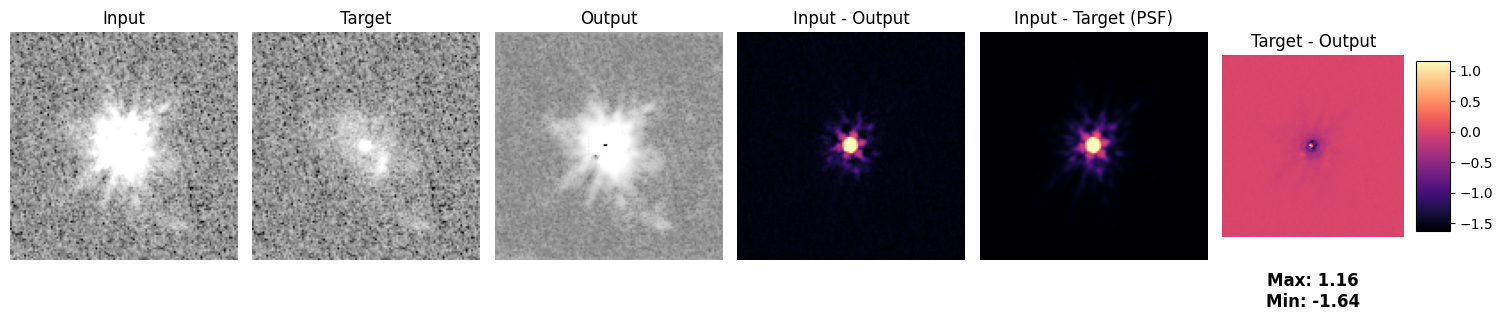

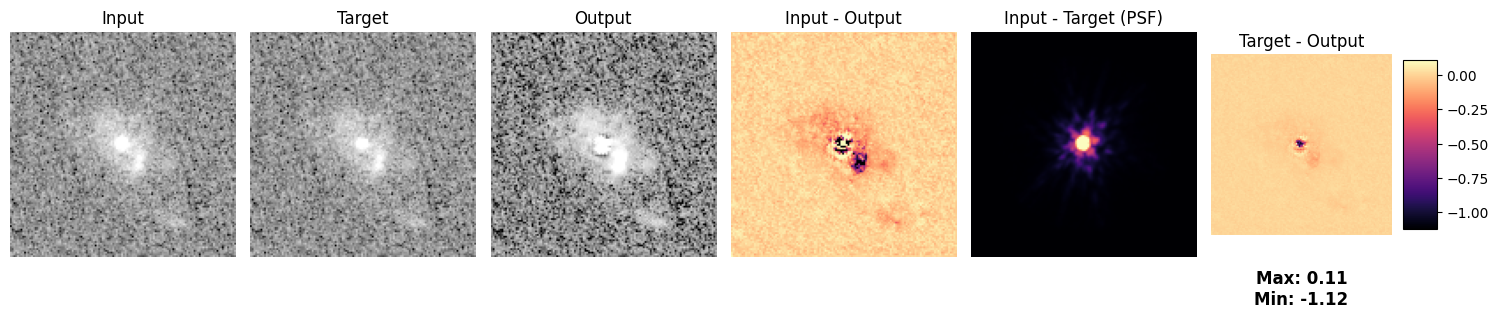

〚 ************************  Diagnostic plots made successfully!  ************************ 〛


In [9]:
source_arr, target_arr, cleaned_image_arr, psf_predicted_arr, psf_arr = tester.clean_images(n=2)

plotter.diagnostic_plot(
    sources=[source_arr],
    targets=[target_arr],
    outputs=[cleaned_image_arr],
    predicted_psfs=[psf_predicted_arr],
    psfs=[psf_arr],
    titles=["UNet"],
    filename="default",
    data_folder="default",
    show_real_min_infered=True,
    save=False
)

# Pretty grid plots

〚 ********************************  Cleaning images...  ******************************** 〛

┌──────────────────────────────────────────────────────────────────────────────────────────┐
│ Filtered dataset to 12 pairs with AGN fractions: [0, 20, 40, 60, 80, 95].                │
└──────────────────────────────────────────────────────────────────────────────────────────┘


Cleaning images: 100%|██████████| 1/1 [00:00<00:00, 41.34image/s]

Source shape: (12, 1, 128, 128)
Target shape: (12, 1, 128, 128)
Cleaned image shape: (12, 1, 128, 128)
PSF predicted shape: (12, 1, 128, 128)
PSF shape: (12, 1, 128, 128)
〚 *****************************  Image cleaning completed!  ***************************** 〛
〚 *******************************  Creating grid plot...  ******************************* 〛


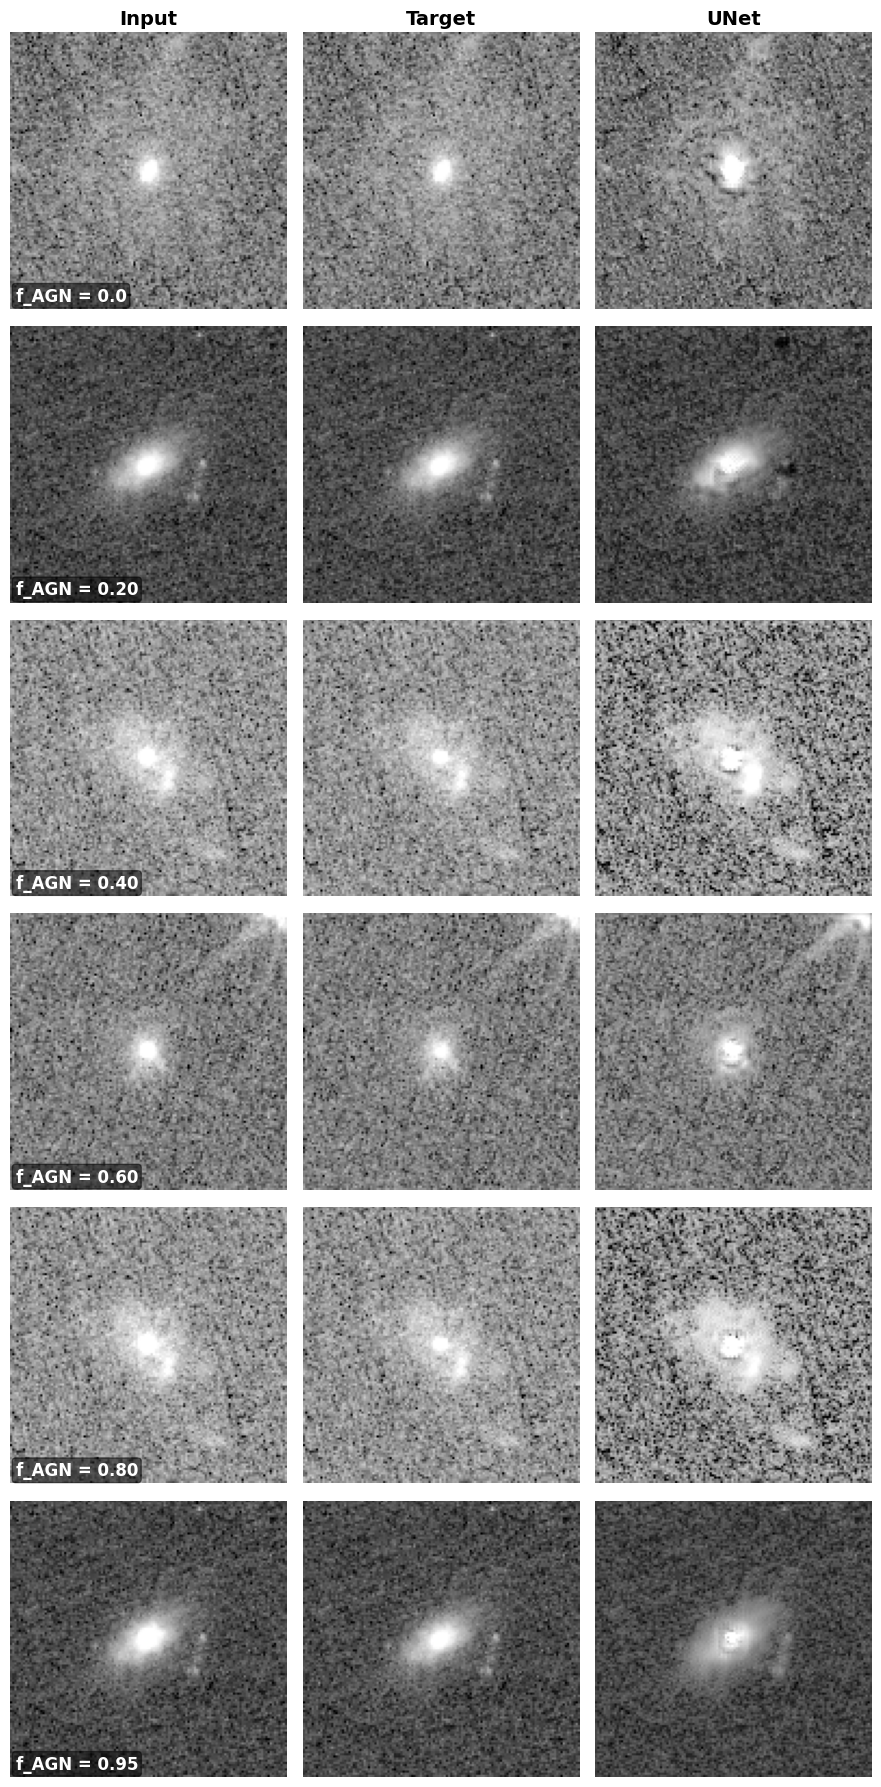

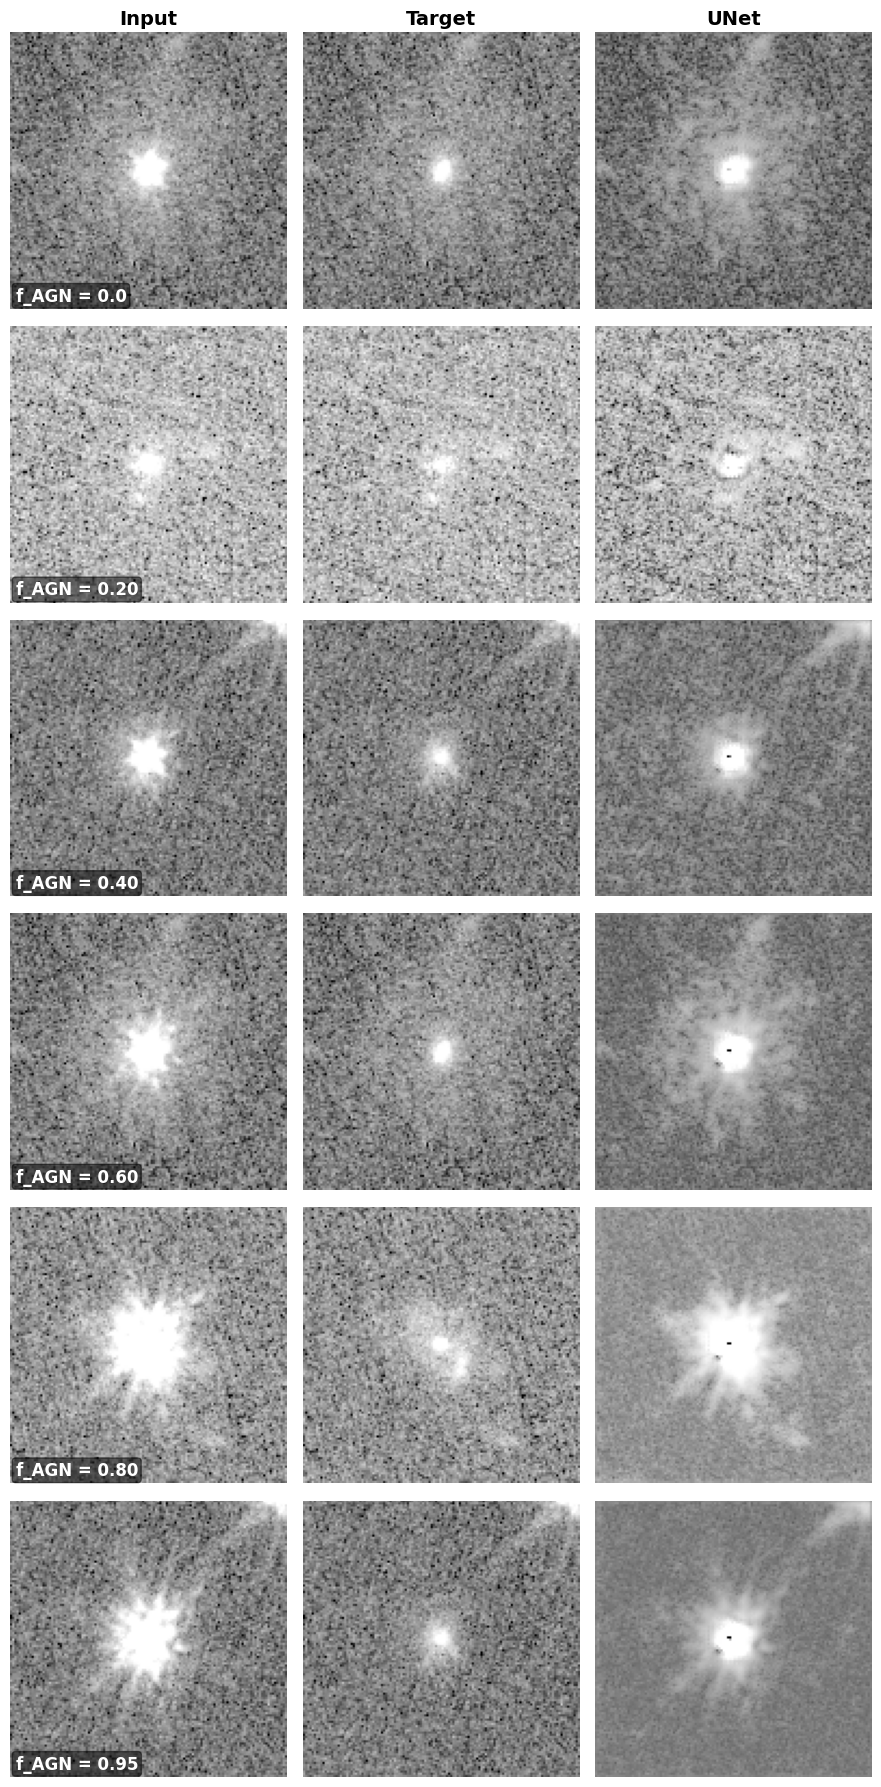

〚 **************************  Grid plot created successfully!  ************************** 〛


In [10]:
f_agn = [0, 20, 40, 60, 80, 95]

source_arr, target_arr, cleaned_image_arr, psf_predicted_arr, psf_arr = tester.clean_images(n=2, f_agn=f_agn)

plotter.grid_plot(
    sources=[source_arr],
    targets=[target_arr],
    outputs=[cleaned_image_arr],
    titles=["UNet"],
    filename="default",
    data_folder="default",
    f_agn=f_agn,
    save=False
)